#### 240702 Quality Check of Cropped Images.

In [1]:
BASE_DIR = '/workspace/mnt/cluster/HDD/azuma/Hematology'

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

import openslide
from openslide import OpenSlide, OpenSlideError
from torch.utils.data import DataLoader

import sys
sys.path.append(BASE_DIR+'/github/DigitalHematology')
from preprocessing import smear_loader

***
#### 1. QC with background area ratio

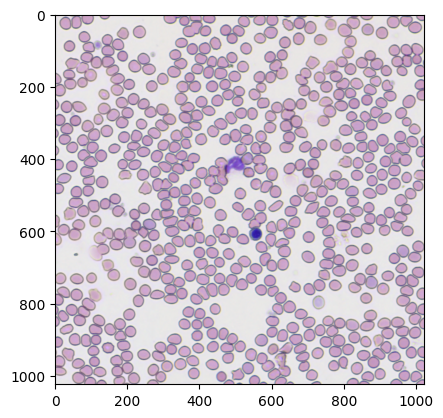

0.47601890563964844


In [2]:
ref_path = BASE_DIR + '/github/DigitalHematology/images/2024_05_27_1138-04_x54500_y59500_1024x1024.png'
img = Image.open(ref_path).convert("RGB")

plt.imshow(img)
plt.show()

# calc background ratio
bg_ratio = smear_loader.calc_bgratio(img_path=ref_path)
print(bg_ratio)


The percentage of good quality image backgrounds would be about 45%~55%.

***
#### 2. Implementation of dataloader
- Note that it is implemented with a hard threshold.
- It is a little time-consuming since the calculation is done for each patch.

In [3]:
slide_path = BASE_DIR+'/datasource/Rat_DILI/sample/2024_05_27__1138-04.tif'

cropped_dataset = smear_loader.SmearDatasetQC(slide_path=slide_path,h=1024,w=1024,extra_padding=128,x_start=30000,x_end=40000,y_start=70000,y_end=80000,qc=True)
cropped_dataloader = DataLoader(cropped_dataset, batch_size=16, shuffle=False)

for img,coords in cropped_dataloader:
    print(img.shape)

Total Patches: 100
Final Patches (passed QC): 51
torch.Size([16, 1280, 1280, 3])
torch.Size([16, 1280, 1280, 3])
torch.Size([16, 1280, 1280, 3])
torch.Size([3, 1280, 1280, 3])


Available as batch.